In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv("train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df.drop(columns=["Cabin"], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
((df["Age"].isna().sum() / len(df))*100).round(2)

np.float64(19.87)

Almost 20% of rows in the Age column is N/A, so it would be replaced with the median age of passengers with the same passenger class and gender

In [14]:
df["Age"] = df["Age"].fillna(df.groupby(["Pclass", "Sex"])["Age"].transform("median"))

In [15]:
conditions = [
    df["Age"] < 2,
    (df["Age"] >= 2) & (df["Age"] < 10),
    (df["Age"] >= 10) & (df["Age"] < 15),
    (df["Age"] >= 15) & (df["Age"] < 18),
    (df["Age"] >= 18) & (df["Age"] < 25),
    (df["Age"] >= 25) & (df["Age"] < 40),
    (df["Age"] >= 40) & (df["Age"] < 60),
    (df["Age"] >= 60)
]
choices = ["Infants (0 to 1)", "Children (2 to 9)", "Preteens (10 to 14)", "Teenagers (15 to 17)", "Youth (18 to 24)", "Adult (25 to 39)", "Middle Aged (40 to 59)", "Elderly (60 and above)"]
df["Age_group"] = np.select(conditions, choices, default="Unknown")

In [16]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Adult (25 to 39)
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Youth (18 to 24)
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,S,Youth (18 to 24)
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Adult (25 to 39)
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Adult (25 to 39)


In [17]:
df["Age_group"] = df["Age_group"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")
df["SibSp"] = df["SibSp"].astype("category")
df["Parch"] = df["Parch"].astype("category")
df["Survived"] = df["Survived"].astype(int)

In [18]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  Age_group    891 non-null    category
dtypes: category(6), float64(2), int64(2), object(2)
memory usage: 48.5+ KB


In [20]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Out of 891 passengers, only 342 passengers survived while the rest (549 passengers) died in the titanic disaster

In [21]:
survival_table = df.groupby("Age_group")["Survived"].value_counts().unstack()
survival_table["Survival_rate %"] = ((
    survival_table[1]/survival_table.sum(axis=1)
)*100).round(2)
survival_table

C:\Users\push\AppData\Local\Temp\ipykernel_6908\1772948143.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_table = df.groupby("Age_group")["Survived"].value_counts().unstack()


Survived,0,1,Survival_rate %
Age_group,,,
Adult (25 to 39),254,133,34.37
Children (2 to 9),22,26,54.17
Elderly (60 and above),19,7,26.92
Infants (0 to 1),2,12,85.71
Middle Aged (40 to 59),99,59,37.34
Preteens (10 to 14),9,7,43.75
Teenagers (15 to 17),19,16,45.71
Youth (18 to 24),125,82,39.61


In [22]:
first_survival_table = df.groupby(["Age_group", "Sex"])["Survived"].value_counts().unstack().sort_values("Age_group", ascending=False)
first_survival_table

C:\Users\push\AppData\Local\Temp\ipykernel_6908\1184083965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_survival_table = df.groupby(["Age_group", "Sex"])["Survived"].value_counts().unstack().sort_values("Age_group", ascending=False)


Survived                         0   1
Age_group              Sex            
Youth (18 to 24)       female   32  72
                       male     93  10
Teenagers (15 to 17)   female    2  14
                       male     17   2
Preteens (10 to 14)    female    4   5
                       male      5   2
Middle Aged (40 to 59) female   12  38
                       male     87  21
Infants (0 to 1)       female    0   4
                       male      2   8
Elderly (60 and above) female    0   4
                       male     19   3
Children (2 to 9)      female   11  15
                       male     11  11
Adult (25 to 39)       female   20  81
                       male    234  52

In [23]:
(df.groupby("Age_group")["Survived"].mean().sort_values(ascending=False)*100).round(2)

C:\Users\push\AppData\Local\Temp\ipykernel_6908\1872891781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("Age_group")["Survived"].mean().sort_values(ascending=False)*100).round(2)


Age_group
Infants (0 to 1)          85.71
Children (2 to 9)         54.17
Teenagers (15 to 17)      45.71
Preteens (10 to 14)       43.75
Youth (18 to 24)          39.61
Middle Aged (40 to 59)    37.34
Adult (25 to 39)          34.37
Elderly (60 and above)    26.92
Name: Survived, dtype: float64

From the table above, it can be said that infants had the highest survival rate while the elderly had the lowest

C:\Users\push\AppData\Local\Temp\ipykernel_6908\2286477572.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_table = (df.groupby("Age_group")["Survived"].mean().sort_values(ascending=False)*100).round(2)


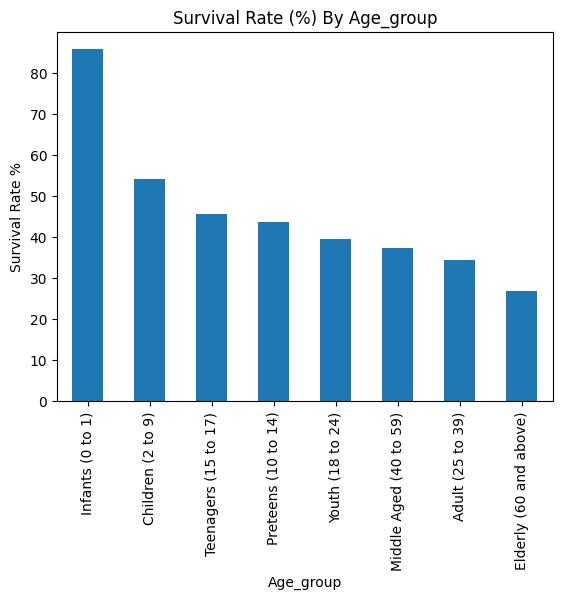

<Figure size 800x500 with 0 Axes>

In [35]:
survival_table = (df.groupby("Age_group")["Survived"].mean().sort_values(ascending=False)*100).round(2)
survival_table.plot(kind="bar")
plt.title("Survival Rate (%) By Age_group")
plt.ylabel("Survival Rate %")
plt.figure(figsize=(8,5))
plt.show()

In [25]:
df.groupby("Sex")["Survived"].value_counts().unstack()


C:\Users\push\AppData\Local\Temp\ipykernel_6908\3189497194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Sex")["Survived"].value_counts().unstack()


Survived,0,1
Sex,,
female,81,233
male,468,109


In [26]:
sr = (df.groupby("Sex")["Survived"].mean().sort_values(ascending= False)*100).round(2)
sr

C:\Users\push\AppData\Local\Temp\ipykernel_6908\2114624936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sr = (df.groupby("Sex")["Survived"].mean().sort_values(ascending= False)*100).round(2)


Sex
female    74.20
male      18.89
Name: Survived, dtype: float64

Women had more survival rate compared to the men

C:\Users\push\AppData\Local\Temp\ipykernel_6908\2375396437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sec_survival_table = (df.groupby("Sex")["Survived"].mean())*100


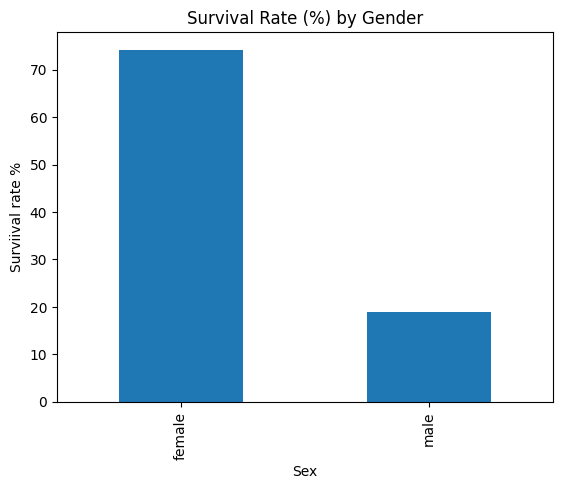

<Figure size 800x500 with 0 Axes>

In [27]:
sec_survival_table = (df.groupby("Sex")["Survived"].mean())*100
sec_survival_table.plot(kind="bar")
plt.title("Survival Rate (%) by Gender")
plt.ylabel("Surviival rate %")
plt.figure(figsize=(8,5))
plt.show()

In [28]:
conditions_1 = [
    df["Pclass"] == 1,
    df["Pclass"] ==2,
    df["Pclass"] == 3
]
choices_1 = ["Upper Class", "Middle Class", "Lower Class"]
df["Status"] = np.select(conditions_1, choices_1, default="Unknown")
df["Status"] = df["Status"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  Age_group    891 non-null    category
 12  Status       891 non-null    category
dtypes: category(7), float64(2), int64(2), object(2)
memory usage: 49.5+ KB


In [29]:
status_survival_table = df.groupby("Status")["Survived"].value_counts().unstack()
status_survival_table["Survival_rate %"] = ((
    status_survival_table[1]/status_survival_table.sum(axis=1)
)*100).round(2)
status_survival_table

C:\Users\push\AppData\Local\Temp\ipykernel_6908\2953804267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_survival_table = df.groupby("Status")["Survived"].value_counts().unstack()


Survived,0,1,Survival_rate %
Status,,,
Lower Class,372,119,24.24
Middle Class,97,87,47.28
Upper Class,80,136,62.96


In [30]:
(df.groupby(["Status", "Sex"])["Survived"].mean().unstack()*100).round(2).sort_values("Status", ascending=False)

C:\Users\push\AppData\Local\Temp\ipykernel_6908\3007006842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(["Status", "Sex"])["Survived"].mean().unstack()*100).round(2).sort_values("Status", ascending=False)


Sex,female,male
Status,,
Upper Class,96.81,36.89
Middle Class,92.11,15.74
Lower Class,50.00,13.54


C:\Users\push\AppData\Local\Temp\ipykernel_6908\3661151197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  third_survival_table = (df.groupby("Status")["Survived"].mean())*100


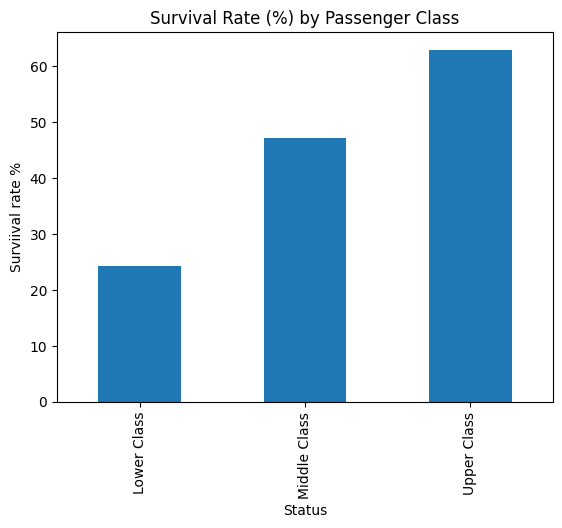

In [37]:
third_survival_table = (df.groupby("Status")["Survived"].mean())*100
third_survival_table.plot(kind="bar")
plt.title("Survival Rate (%) by Passenger Class")
plt.ylabel("Surviival rate %")
plt.show()

In [31]:
embarked_rate = (df.groupby("Embarked")["Survived"].mean()*100).round(2)
embarked_rate

C:\Users\push\AppData\Local\Temp\ipykernel_6908\3023124851.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  embarked_rate = (df.groupby("Embarked")["Survived"].mean()*100).round(2)


Embarked
C    55.36
Q    38.96
S    33.90
Name: Survived, dtype: float64

The survival rate of the people that embarked from C was the highest compared to the two other locations

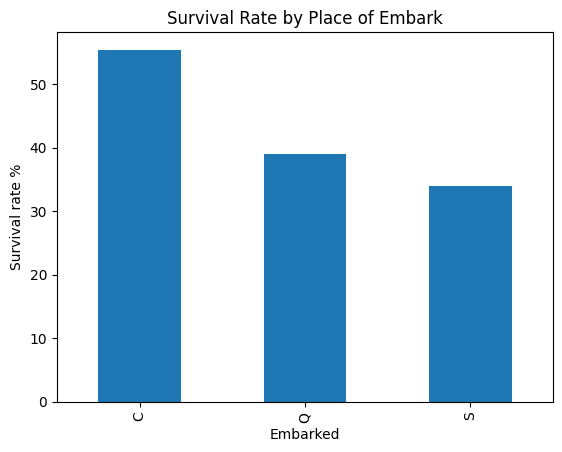

In [33]:
embarked_rate.plot(kind="bar")
plt.title("Survival Rate by Place of Embark")
plt.ylabel("Survival rate %")
plt.show()

C:\Users\push\AppData\Local\Temp\ipykernel_6908\1267389348.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index="Age_group", columns="Sex", values= "Survived", aggfunc="mean")


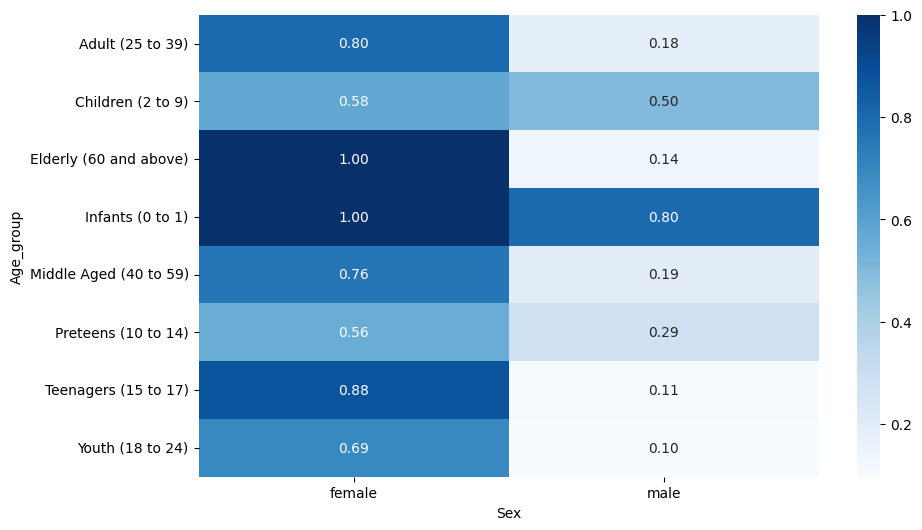

In [39]:
pivot = df.pivot_table(index="Age_group", columns="Sex", values= "Survived", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.show()